In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

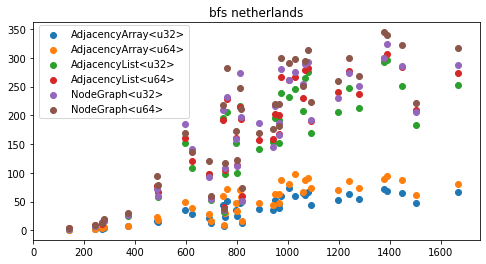

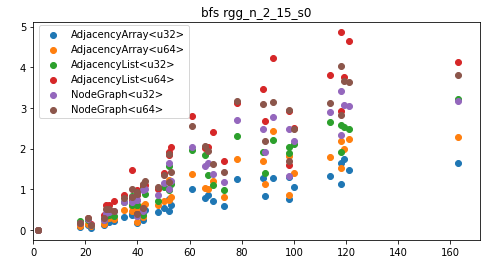

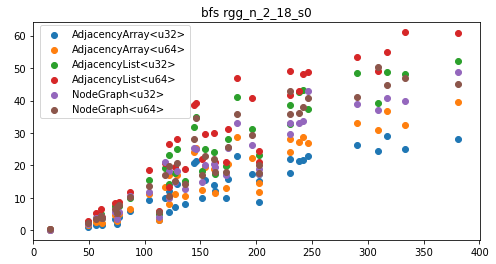

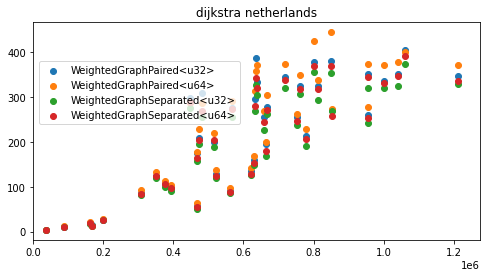

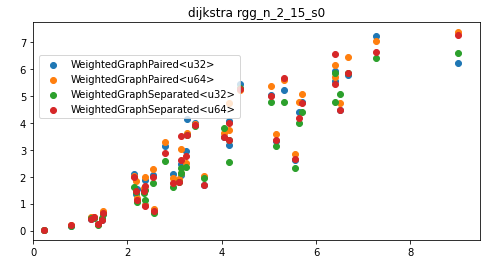

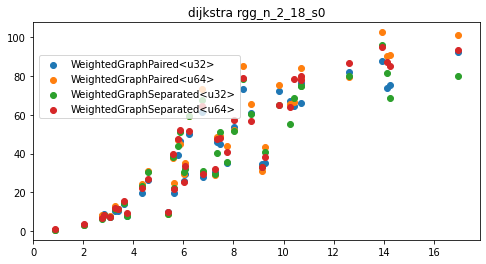

In [2]:
df_single = pd.read_csv("../build/benchmark-single.csv", delim_whitespace=True)

for (algorithm, graph_instance_name), df in df_single.groupby(["algorithm", "graph instance name"]):

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(f"{algorithm} {graph_instance_name}")

    ax.set_xlim((0, df["distance"].max() * 1.05))
    #ax.set_ylim((0, df["bfs (ms)"].max() * 1.05))

    for graph_class_name, group_df in df.groupby("graph class name"):
        x = group_df["distance"].values
        y = group_df["algorithm (ms)"].values
        idx = np.argsort(x)
        ax.scatter(x[idx], y[idx], label=graph_class_name)

    fig.legend(loc=(0.08, 0.55))
    plt.show()

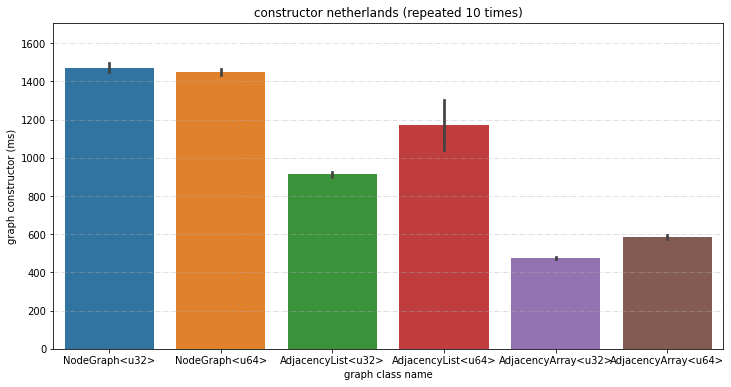

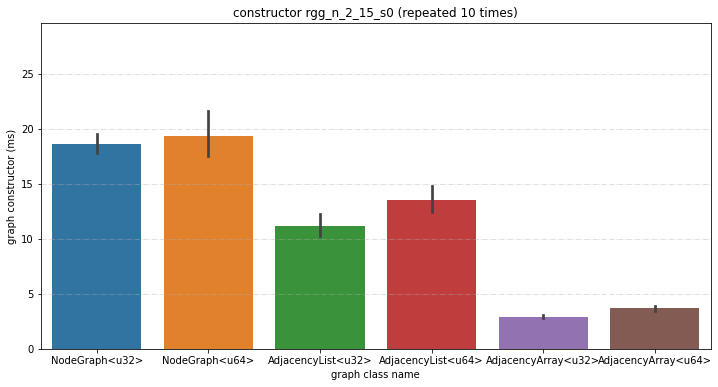

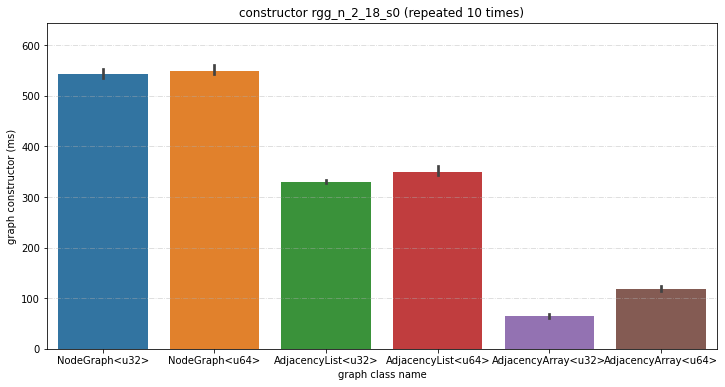

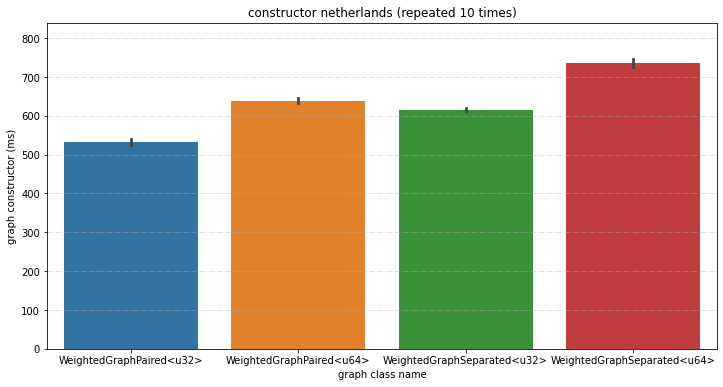

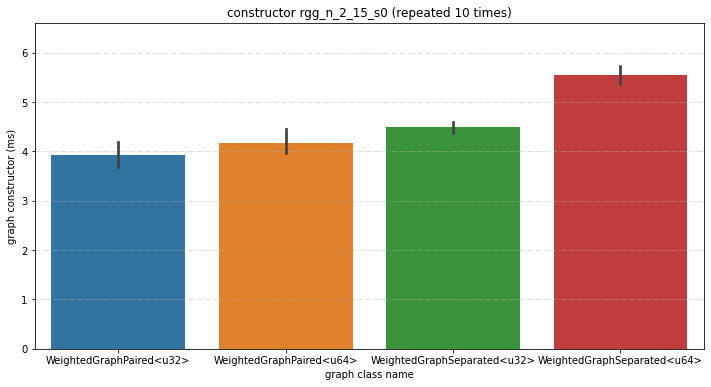

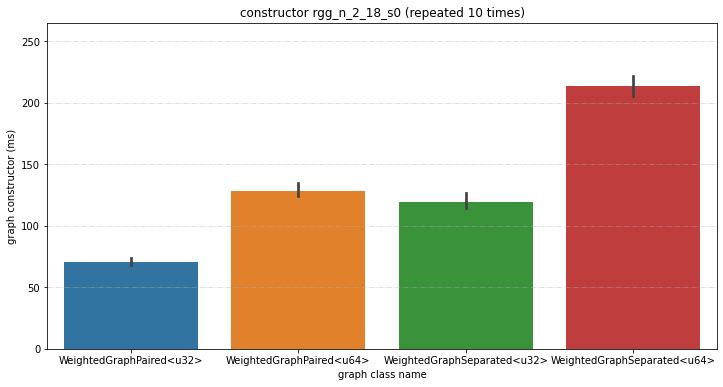

In [ ]:
df_batched = pd.read_csv("../build/benchmark-batched.csv", delim_whitespace=True)


def plot_box(df, col, file_path_template, title_template):
    for (algorithm, graph_instance_name), df_group in df.groupby(["algorithm", "graph instance name"]):
        y = df_group[col]
        
        num_queries = df_group["number of queries"].values[0]
        num_repetitions = df_group.groupby("graph class name").count().values[0,0]

        fig, ax = plt.subplots(figsize=(12, 6))

        ax.set_ylim((0, y.max() * 1.1))
        ax.set_title(title_template.format(algorithm=algorithm, graph_instance_name=graph_instance_name, num_queries=num_queries, num_repetitions=num_repetitions))
        ax.grid(True, "major", "y", linestyle="-.", alpha=0.5)

        sns.barplot(x="graph class name", y=y, data=df_group, ax=ax)
        
        ax.set_ylabel(y.name.replace("algorithm", algorithm))

        plt.savefig(file_path_template.format(algorithm=algorithm, graph_instance_name=graph_instance_name), dpi=300)
        plt.show()

plot_box(df_batched, "graph constructor (ms)", "constructor-{algorithm}-{graph_instance_name}.pdf", "constructor {graph_instance_name} (repeated {num_repetitions} times)")
plot_box(df_batched, "algorithm mean (ms)", "queries-{algorithm}-{graph_instance_name}.pdf", "{algorithm} {graph_instance_name} (mean time of {num_queries} random queries, repeated {num_repetitions} times for same queries)")

In [ ]:
df_batched = pd.read_csv("../build/benchmark-batched.csv", delim_whitespace=True)


def plot_box(df, col, file_path_template, title_template):
    for algorithm, df_group in df.groupby("algorithm"):
        y = 1000 * df_group[col] / df_group["n"]
        
        num_queries = df_group["number of queries"].values[0]
        num_repetitions = df_group.groupby("graph class name").count().values[0,0] // 3

        fig, ax = plt.subplots(figsize=(14, 6))

        ax.set_ylim((0, y.max() * 1.1))
        ax.set_title(title_template.format(algorithm=algorithm, graph_instance_name=graph_instance_name, num_queries=num_queries, num_repetitions=num_repetitions))
        ax.grid(True, "major", "y", linestyle="-.", alpha=0.5)

        sns.barplot(hue="graph class name", y=y, x="graph instance name", data=df_group, ax=ax)#, width=0.4)
        
        ax.set_ylabel("time per node (ns/node)")

        plt.show()

plot_box(df_batched, "graph constructor (ms)", "constructor-{algorithm}-{graph_instance_name}.pdf", "constructor (repeated {num_repetitions} times)")
plot_box(df_batched, "algorithm mean (ms)", "queries-{algorithm}-{graph_instance_name}.pdf", "{algorithm} ({num_queries} random queries, repeated {num_repetitions} times for same queries)")